# Lab 4 - Hypothesis testing and statistical analysis

## Get the data (1 mark)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('census11sample.csv')
df

,Unnamed: 0,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,0,27,32,65,60,44,79,43,8,9
1,1,10,36,40,19,52,46,58,87,40
2,2,82,53,60,34,2,29,18,46,57
3,3,33,63,25,60,9,26,30,52,74
4,4,55,98,4,47,58,37,18,67,19
...,...,...,...,...,...,...,...,...,...,...
995,995,42,59,47,37,61,67,29,16,21
996,996,49,45,16,80,87,86,4,79,74
997,997,31,5,25,39,52,22,17,8,34
998,998,38,69,52,4,3,76,24,51,94


## Divide the data (2 marks)

In [3]:
df = df.drop(columns = ['Unnamed: 0'])
df

,North East,North West,Yorkshire and The Humber,East Midlands,West Midlands,East of England,London,South East,South West
0,27,32,65,60,44,79,43,8,9
1,10,36,40,19,52,46,58,87,40
2,82,53,60,34,2,29,18,46,57
3,33,63,25,60,9,26,30,52,74
4,55,98,4,47,58,37,18,67,19
...,...,...,...,...,...,...,...,...,...
995,42,59,47,37,61,67,29,16,21
996,49,45,16,80,87,86,4,79,74
997,31,5,25,39,52,22,17,8,34
998,38,69,52,4,3,76,24,51,94


In [12]:
explore = df.head(500)
test = df.tail(500)

## Explore the data (5 marks)

[]

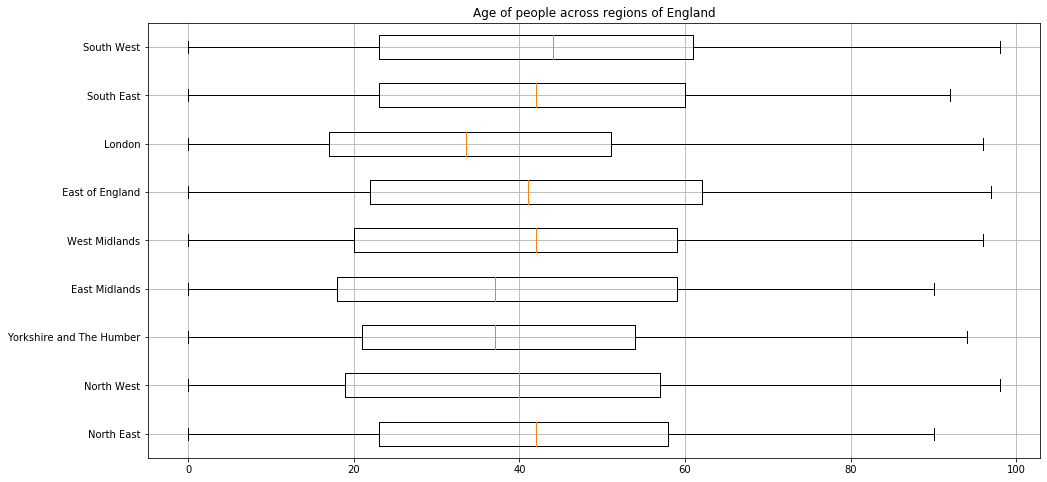

In [13]:
neast = explore['North East']
nwest = explore['North West']
york = explore['Yorkshire and The Humber']
emid = explore['East Midlands']
wmid = explore['West Midlands']
east = explore['East of England']
london = explore['London']
seast = explore['South East']
swest = explore['South West']

fig, ax = plt.subplots(figsize=(16,8))
ax.set_yticklabels(['North East', 'North West', 'Yorkshire and The Humber', 'East Midlands', 'West Midlands', ' East of England', 'London', 'South East', 'South West'])
ax.set_title('Age of people across regions of England')
plt.boxplot([neast, nwest, york, emid, wmid, east, london, seast, swest], vert=False)
ax.grid(True)
plt.plot()

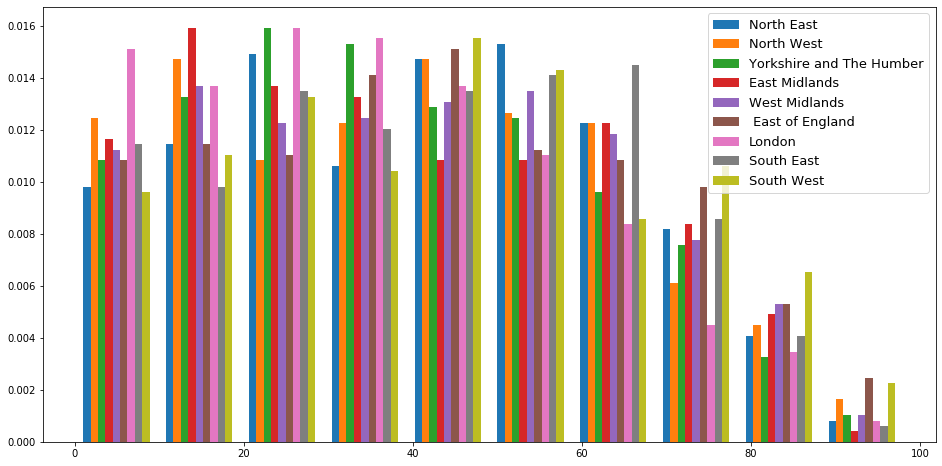

In [14]:
neast = explore['North East']
nwest = explore['North West']
york = explore['Yorkshire and The Humber']
emid = explore['East Midlands']
wmid = explore['West Midlands']
east = explore['East of England']
london = explore['London']
seast = explore['South East']
swest = explore['South West']

total = []
total.append(neast)
total.append(nwest)
total.append(york)
total.append(emid)
total.append(wmid)
total.append(east)
total.append(london)
total.append(seast)
total.append(swest)

fig, ax = plt.subplots(figsize=(16,8))

list = ['North East', 'North West', 'Yorkshire and The Humber', 'East Midlands', 'West Midlands', ' East of England', 'London', 'South East', 'South West']
ax.hist(total, 10, density=True, histtype='bar' , label=list)
ax.legend(prop={'size': 13})

plt.show()


In [15]:
neast = explore['North East']
nwest = explore['North West']
york = explore['Yorkshire and The Humber']
emid = explore['East Midlands']
wmid = explore['West Midlands']
east = explore['East of England']
london = explore['London']
seast = explore['South East']
swest = explore['South West']

londonmed = np.median(london)

neastmed = np.median(neast)
nwestmed = np.median(nwest)
yorkmed = np.median(york)
emidmed = np.median(emid)
wmidmed = np.median(wmid)
eastmed = np.median(east)
seastmed = np.median(seast)
swestmed = np.median(swest)
medarr = []

medarr.append(neastmed)
medarr.append(nwestmed)
medarr.append(yorkmed)
medarr.append(emidmed)
medarr.append(wmidmed)
medarr.append(eastmed)
medarr.append(seastmed)
medarr.append(swestmed)

print(londonmed)
print(medarr)

33.5
[42.0, 40.0, 37.0, 37.0, 42.0, 41.0, 42.0, 44.0]


## State your hypothesis, and state the evidence that justifies it. (2 marks)

Hypothesis: The average age of people in London is lower then the rest of the country. Based on my exploration of the data this seems to be the case. London's box plot was further to the lower ages than the rest of the country and on the bar chart london generally had higher bars for lower ages than the rest of the country. It also has a lower median.

## Plan the test. (3 marks)

I plan to carry out a one tailed test on the data for london. I will compare the lower tails of the other regions of the country to the upper tail for London and if they lie below this tail I will reject the null hypothesis, as if there is an overlap (i.e.  the upper tail for London is above the lower tail for the others) then the mean of ages in London may not be lower then the rest of the country. 


H0: There is insufficient evidence to suggest that the average age of people in London is lower than the rest of the country.

H1: There is sufficient evidence to suggest that the average age of people in London is lower than the rest of the country.

I will carry out this test at the 95% probability level.

## Perform the statistical test of the hypothesis. (5 marks)

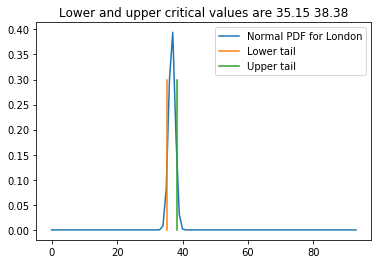

In [16]:
import numpy as np
import matplotlib.pyplot as plt

london = test["London"]
lonarr = london.values
#london = london.sort_values()
lonmean = np.mean(lonarr)
#lonsem = stats.sem(london, ddof=998)
lonsem = stats.sem(lonarr)
#lonsd = np.std(lonarr)

alpha = 0.05
lower = stats.norm.ppf(alpha,lonmean,lonsem)
upper = stats.norm.ppf(1-alpha,lonmean,lonsem)

x=np.arange(np.amin(london),np.amax(london),1)
y=stats.norm.pdf(x,lonmean,lonsem)

plt.plot(x,y,label='Normal PDF for London')
plt.plot([lower,lower],[0,0.3],label="Lower tail")
plt.plot([upper,upper],[0,0.3],label="Upper tail")
plt.legend()
plt.title("Lower and upper critical values are %2.2f %2.2f" %(lower,upper))
plt.show()


In [23]:
neast = test['North East']
nwest = test['North West']
york = test['Yorkshire and The Humber']
emid = test['East Midlands']
wmid = test['West Midlands']
east = test['East of England']
seast = test['South East']
swest = test['South West']

alpha = 0.05
lower = stats.norm.ppf(alpha,lonmean,lonsem)

lowerTails = []

neastmean = np.mean(neast)
neastsem = stats.sem(neast)
lower = stats.norm.ppf(alpha,neastmean,neastsem)

lowerTails.append("North East: " + str(lower))


nwestmean = np.mean(nwest)
nwestsem = stats.sem(nwest)
lower = stats.norm.ppf(alpha,nwestmean,nwestsem)

lowerTails.append("North West: " + str(lower))

yorkmean = np.mean(york)
yorksem = stats.sem(york)
lower = stats.norm.ppf(alpha,yorkmean,yorksem)

lowerTails.append("Yorkshire and The Humber: " + str(lower))

emidmean = np.mean(emid)
emidsem = stats.sem(emid)
lower = stats.norm.ppf(alpha,emidmean,emidsem)

lowerTails.append("East Midlands: " + str(lower))

wmidmean = np.mean(wmid)
wmidsem = stats.sem(wmid)
lower = stats.norm.ppf(alpha,wmidmean,wmidsem)

lowerTails.append("West Midlands: " + str(lower))

eastmean = np.mean(east)
eastsem = stats.sem(east)
lower = stats.norm.ppf(alpha,eastmean,eastsem)

lowerTails.append("East of England: " + str(lower))

seastmean = np.mean(seast)
seastsem = stats.sem(seast)
lower = stats.norm.ppf(alpha,seastmean,seastsem)

lowerTails.append("South East: " + str(lower))

swestmean = np.mean(swest)
swestsem = stats.sem(swest)
lower = stats.norm.ppf(alpha,swestmean,swestsem)

lowerTails.append("South West: " + str(lower))

print(lowerTails)

['North East: 37.47364745087988', 'North West: 36.94449707409918', 'Yorkshire and The Humber: 37.618416519749445', 'East Midlands: 37.88709891618538', 'West Midlands: 38.05439850421933', 'East of England: 39.055999801926156', 'South East: 37.13982641431155', 'South West: 41.42119261724234']


Upper tail value for London: 38.38  
Lower tails for other regions are to 2 decimal places

North East: 37.47 < 38.38  
North West: 36.94 < 38.38  
Yorkshire and The Humber: 37.62 < 38.38   
East Midlands: 37.89 < 38.38  
West Midlands: 38.05 < 38.38  
East of England: 39.06 > 38.38  
South East: 37.14 < 38.38  
South West: 41.42 > 38.38  


For almosyt every region the lower tails of the ages is below than the upper tail of the distribution for London. This implies that there is insufficient evidence to suggest that the average age of London is lower than the other regions of the country as the mean age of London could be greater the means of most of the other regions.

## Conclusions. (2 Marks) 

Using the method of finding the upper tail for the London distribution and comparing the lower tails of the other regions to this value, I have found that there is insufficient evidence to reject the null hypothesis at the 95% level (accept the null hypothesis). 